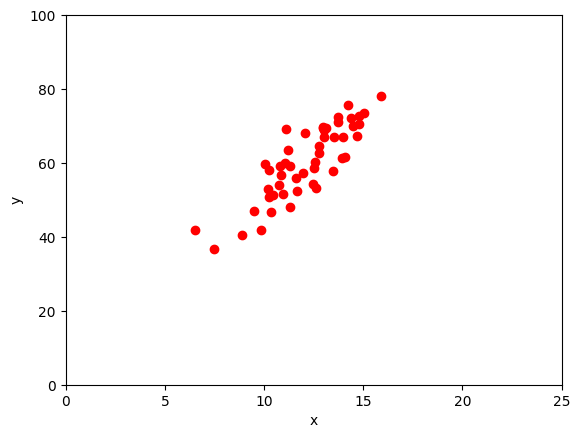

0 [2.7069232] [0.15043421]
0 788.6925


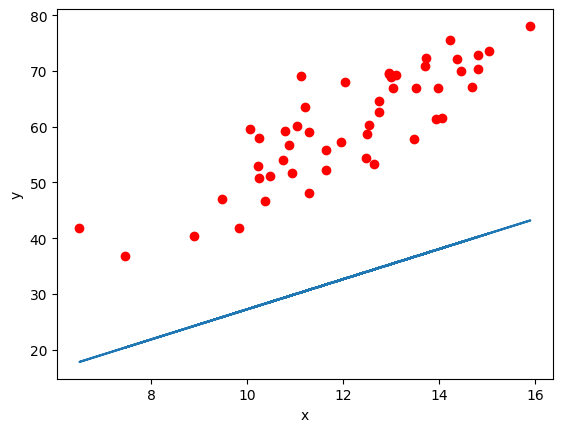

1 [3.7222757] [0.23273665]
1 254.1789


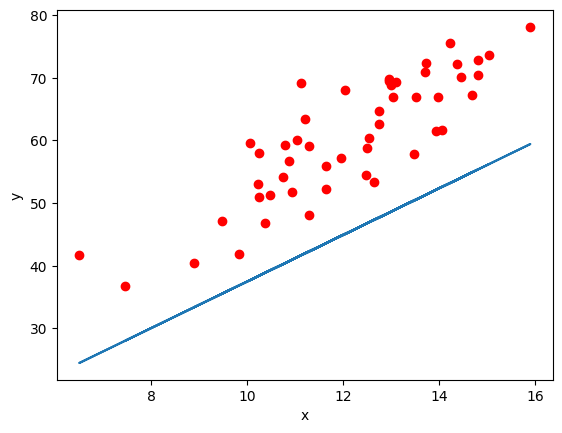

2 [4.2758865] [0.2778894]
2 95.262245


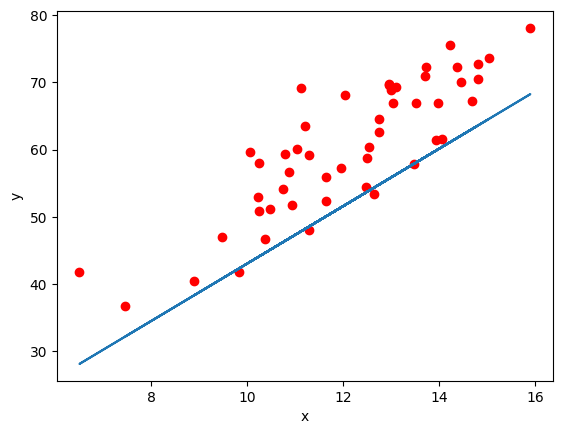

3 [4.577727] [0.3027858]
3 48.014515


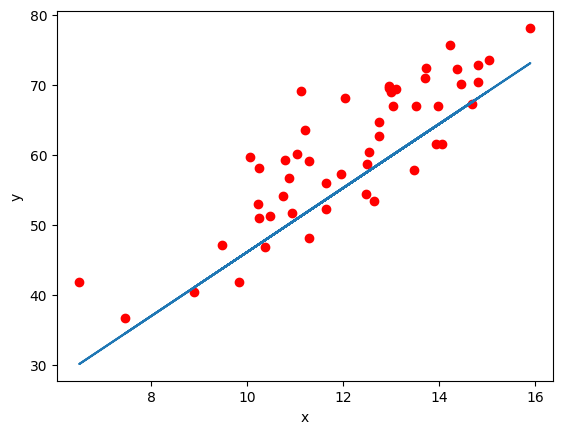

4 [4.7422867] [0.31663722]
4 33.967087


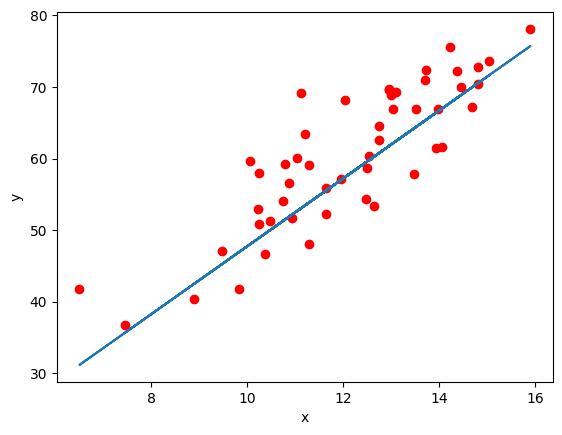

5 [4.8319926] [0.32446617]
5 29.79046


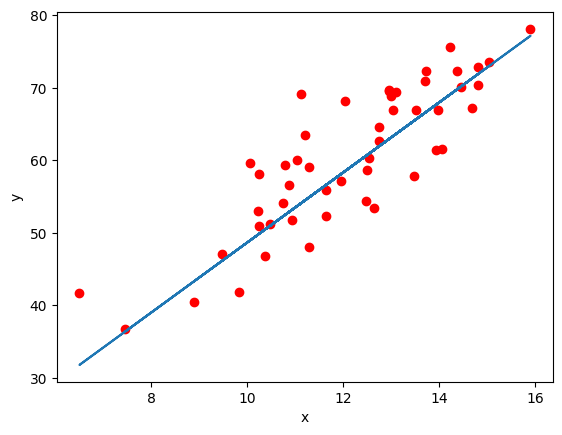

6 [4.8808837] [0.3290113]
6 28.548534


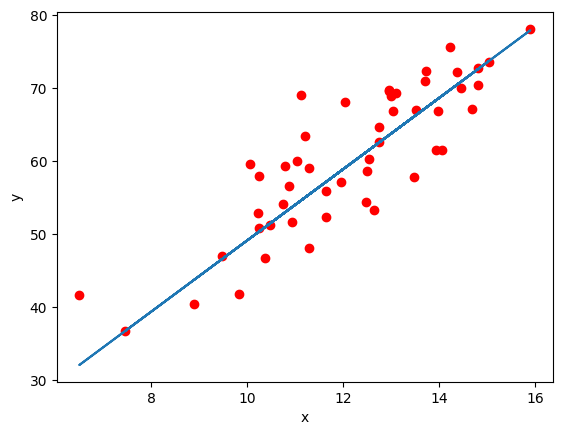

7 [4.90752] [0.33176586]
7 28.179115


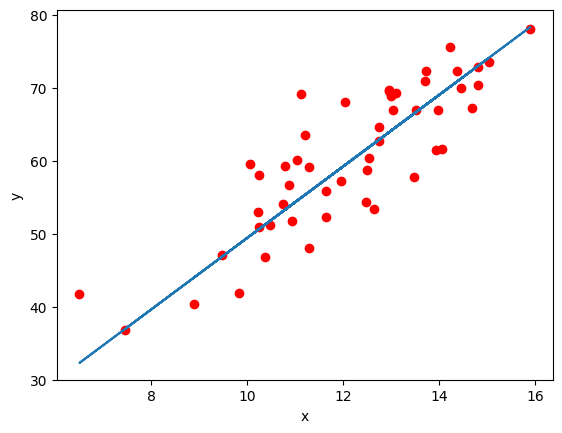

8 [4.9220214] [0.33354408]
8 28.069115


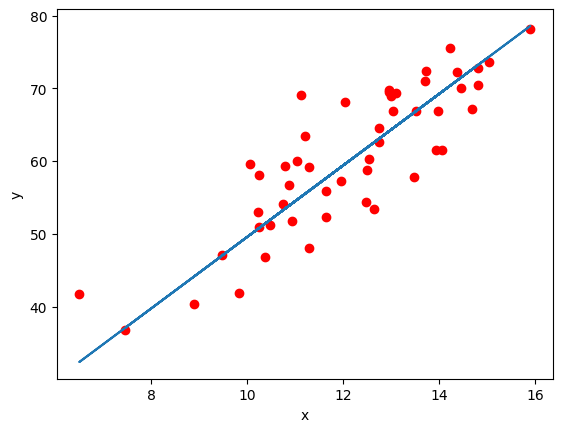

9 [4.9299064] [0.3347899]
9 28.036232


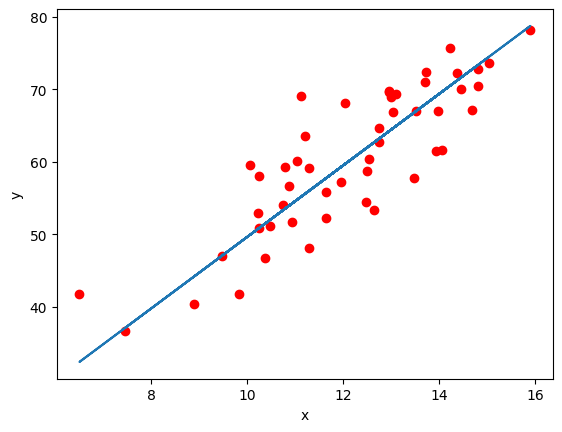

W_data =  [[2.7069232]
 [3.7222757]
 [4.2758865]
 [4.577727 ]
 [4.7422867]
 [4.8319926]
 [4.8808837]
 [4.90752  ]
 [4.9220214]
 [4.9299064]]
v_data =  [[0.15043421]
 [0.23273665]
 [0.2778894 ]
 [0.3027858 ]
 [0.31663722]
 [0.32446617]
 [0.3290113 ]
 [0.33176586]
 [0.33354408]
 [0.3347899 ]]
Loss_data =  [788.6925   254.1789    95.262245  48.014515  33.967087  29.79046
  28.548534  28.179115  28.069115  28.036232]


In [6]:
##-----------------
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# 텐서플로우 2.0 환경에서 1.x 코드 실행하기
# print(tf.__version__)


def Data_Genearion(num_points):

    num_points = 50
    vectors_set = []
    for i in np.arange(num_points):
        x = np.random.normal(2, 2) + 10  #-- 정규분포(평균, 분산) 랜덤 데이터 생성 16% 68% 16% + 평균 이동
        y = x * 5 + (np.random.normal(0, 3)) * 2 #-- * 표준 편차, + 평균 이동
        vectors_set.append([x, y])
        # print(np.round(vectors_set, 1))
        # print(np.round(y, 1))

    x_data = np.array([v[0] for v in vectors_set])
    y_data = np.array([v[1] for v in vectors_set])
    # print(np.round(x_data, 1))
    # print(np.round(y_data, 1))

    return  x_data, y_data



def Data_Draw(x_data, y_data):
    plt.plot(x_data, y_data,'ro')
    plt.ylim([0,100])
    plt.xlim([0,25])
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.legend()
    plt.show()


def Data_Learning(x_data, y_data):
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
    # init = tf.initialize_all_variables()
    # sess = tf.Session()
    # sess.run(init)
    # sess.run(W)
    # print('sess.run(W)= ', sess.run(W))
    # array([0.05211711], dtype=float32)
    b = tf.Variable(tf.zeros([1]))
    # print('sess.run(b)= ', sess.run(b))
    # array([0.], dtype=float32)
    y = W * x_data + b
    # print('sess.run(y)= ', sess.run(y))
    # y=np.round(sess.run(y), 1)
    # print(y)
    loss = tf.reduce_mean(tf.square(y - y_data))
    # print(np.round(sess.run(loss),1))
    optimizer = tf.train.GradientDescentOptimizer(0.0015)
    train = optimizer.minimize(loss)
    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)

    train_set = []  ###
    for step in np.arange(10):
        sess.run(train)
        print(step, sess.run(W), sess.run(b))
        print(step, sess.run(loss))
        train_set.append([sess.run(W), sess.run(b), sess.run(loss)])  ###

        plt.plot(x_data, y_data, 'ro')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
        plt.xlabel('x')
        plt.ylabel('y')
        #plt.legend()
        plt.show()

    W_data = np.array([t[0] for t in train_set])
    v_data = np.array([t[1] for t in train_set])
    Loss_data= np.array([t[2] for t in train_set])

    return W_data,v_data, Loss_data


if __name__ == '__main__':
    num_points=50
    x_data, y_data=Data_Genearion(num_points)
    Data_Draw(x_data, y_data)

    W_data, v_data, Loss_data = Data_Learning(x_data, y_data)

    #for step in np.arange(10):

        #W_data[step]
    print('W_data = ', W_data)
    print('v_data = ', v_data)
    print('Loss_data = ', Loss_data)

In [5]:
num_points = 50
vectors_set = []
for i in np.arange(num_points):
    x = np.random.normal(2, 2) + 10  #-- 정규분포(평균, 분산) 랜덤 데이터 생성 16% 68% 16% + 평균 이동
    y = x * 5 + (np.random.normal(0, 3)) * 2 #-- * 표준 편차, + 평균 이동
    vectors_set.append([x, y])
    # print(np.round(vectors_set, 1))
    # print(np.round(y, 1))

x_data = np.array([v[0] for v in vectors_set])
y_data = np.array([v[1] for v in vectors_set])
print(x_data)
print(y_data)

[12.04209975 10.20879851 12.2542118  18.11005586 10.5555193   9.73181508
  9.91751827 15.8427017  14.96807988 11.12457031 16.11537713 13.76086051
 11.18391816 11.73201502 11.23317687 13.66810661 13.4358133  12.84300931
 13.6558702  12.80818736  8.55704097 15.10690782 13.65105056 17.27989809
 12.29188487 13.663272   13.49214123  8.54977111 13.61347269  8.13125385
 10.09576944 10.93551111 11.39948178  7.12509858 13.40826847 13.46125352
 10.25478085  5.70573538 15.77183663 15.76773316 11.24264264  9.74950371
 10.72507138 12.08917309  7.21315977 14.40232264 10.9298125   8.96381534
 15.05203097 12.61057024]
[74.40587169 50.97694886 63.13891357 88.14581565 56.91646623 44.23875007
 40.65875789 72.92488512 95.95826637 55.99437254 81.83110776 72.23207661
 61.32420077 60.72384096 44.17268406 65.17559208 69.7999886  56.96471409
 61.54855074 67.68661304 37.65788622 70.89238365 63.62941209 85.84475373
 66.43564792 69.18809733 73.03296868 37.62707929 66.50551388 41.14299463
 51.92053096 51.68916172 